<a href="https://colab.research.google.com/github/soumik12345/MIRNet/blob/master/notebooks/MIRNet_LOL_Inference_256x256.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Fri Dec  4 21:32:18 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.45.01    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P8     9W /  70W |      0MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
!git clone https://github.com/soumik12345/MIRNet
%cd MIRNet

Cloning into 'MIRNet'...
remote: Enumerating objects: 209, done.
remote: Counting objects: 100% (209/209), done.
remote: Compressing objects: 100% (160/160), done.
remote: Total 209 (delta 92), reused 149 (delta 40), pack-reused 0
Receiving objects: 100% (209/209), 21.31 MiB | 17.64 MiB/s, done.
Resolving deltas: 100% (92/92), done.
/content/MIRNet


In [3]:
!pip install -q wandb

     |████████████████████████████████| 1.8MB 12.5MB/s 
     |████████████████████████████████| 133kB 58.5MB/s 
     |████████████████████████████████| 163kB 62.3MB/s 
     |████████████████████████████████| 102kB 15.2MB/s 
     |████████████████████████████████| 102kB 14.1MB/s 
     |████████████████████████████████| 71kB 10.7MB/s 


In [4]:
from glob import glob
from matplotlib import pyplot as plt
from mirnet.inference import Inferer
from mirnet.utils import download_dataset, plot_result

In [5]:
download_dataset('LOL')

Downloading...
From: https://drive.google.com/uc?id=157bjO1_cFuSd0HWDUuAmcHRJDVyWpOxB
To: /content/MIRNet/LOLdataset.zip
347MB [00:02, 157MB/s]


Unpacking Dataset
Done!!!


In [6]:
inferer = Inferer()
inferer.download_weights('1sUlRD5MTRKKGxtqyYDpTv7T3jOW6aVAL')

Downloading...
From: https://drive.google.com/uc?id=1sUlRD5MTRKKGxtqyYDpTv7T3jOW6aVAL
To: /content/MIRNet/low_light_weights_best.h5
148MB [00:00, 149MB/s]


In [8]:
inferer.build_model(
    num_rrg=3, num_mrb=2, channels=64,
    weights_path='low_light_weights_best.h5'
)

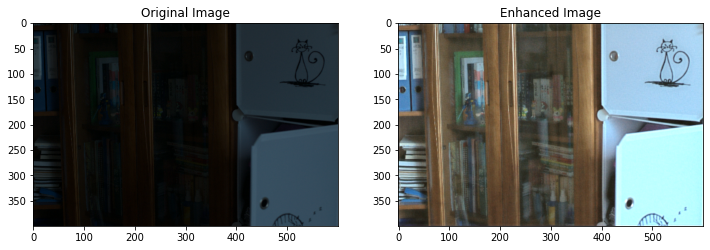

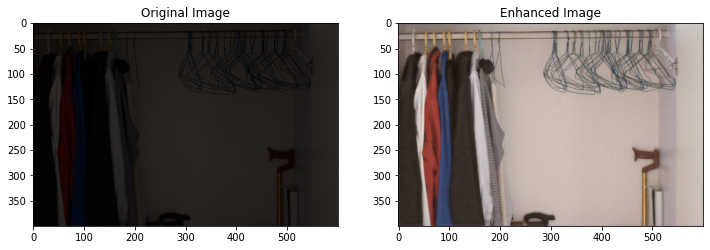

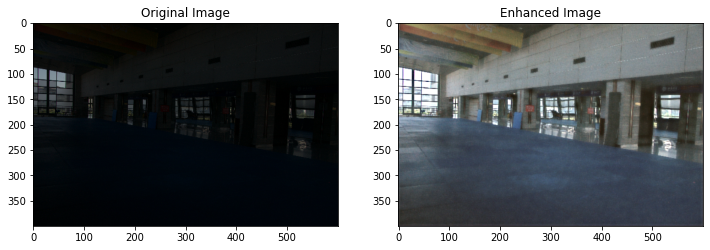

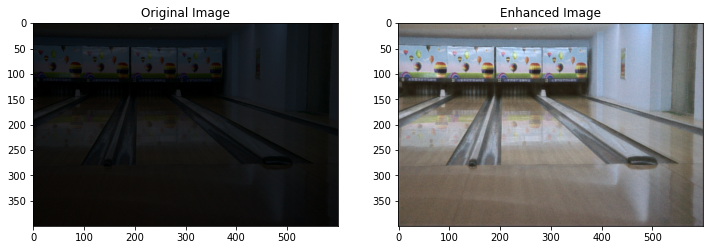

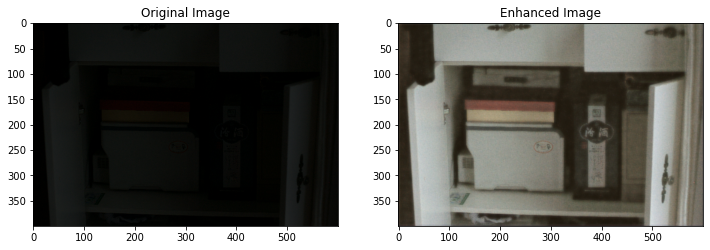

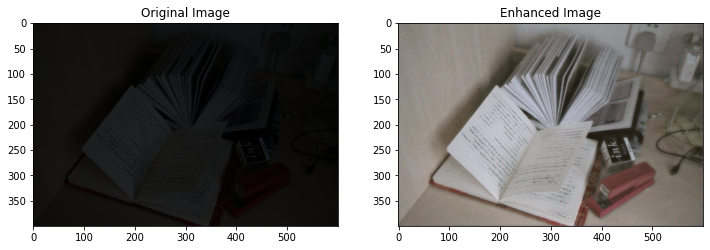

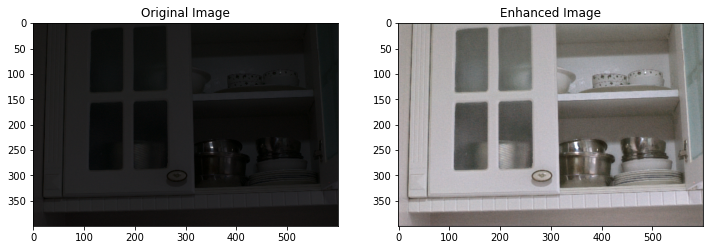

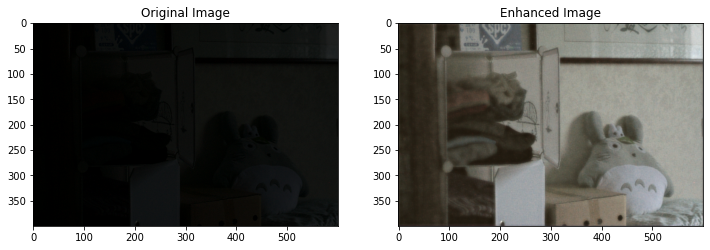

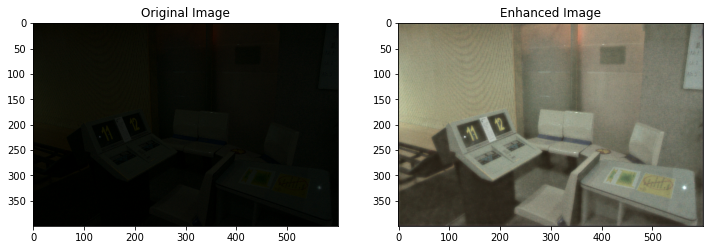

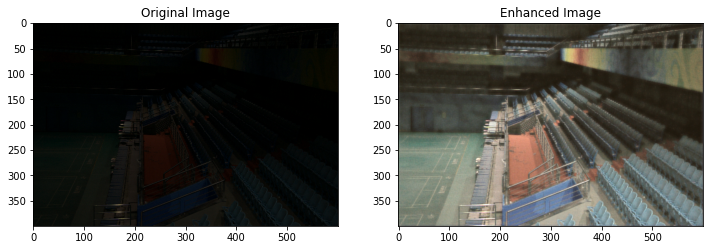

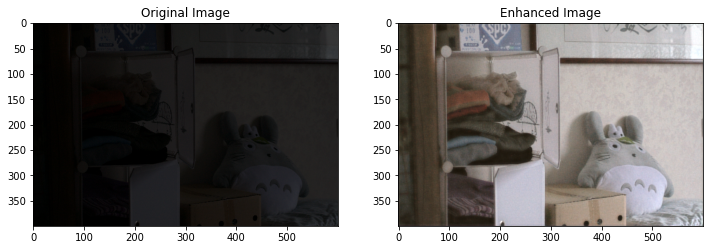

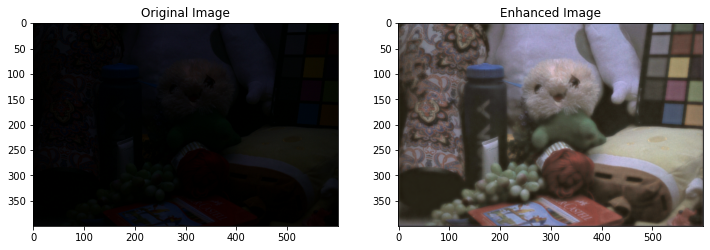

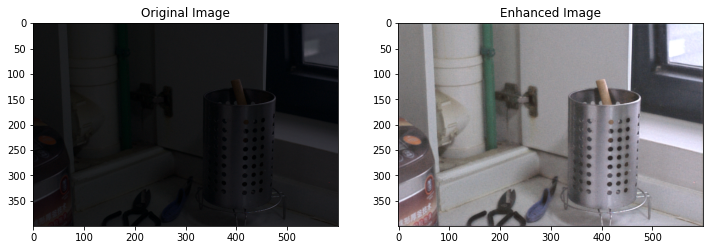

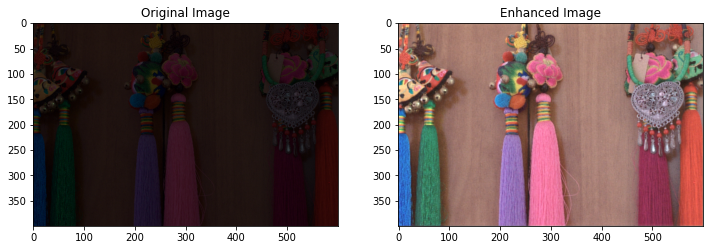

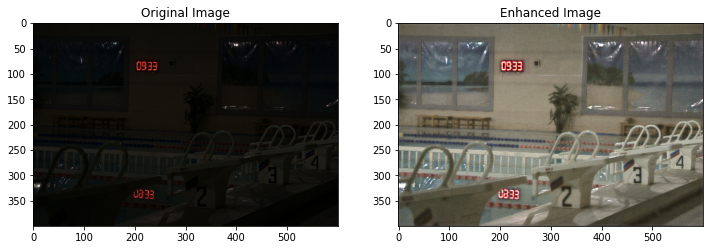

In [9]:
low_light_images = glob('./eval15/low/*')
for image_path in low_light_images:
    original_image, output_image = inferer.infer(image_path)
    plot_result(original_image, output_image)

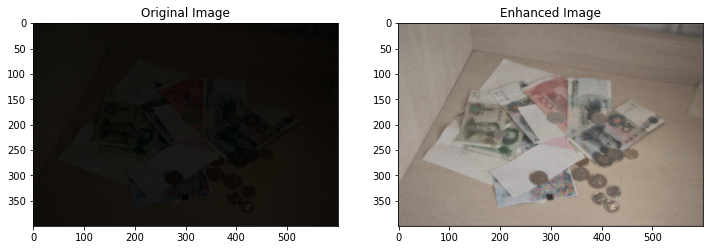

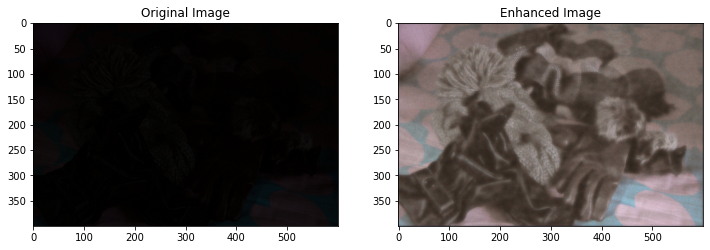

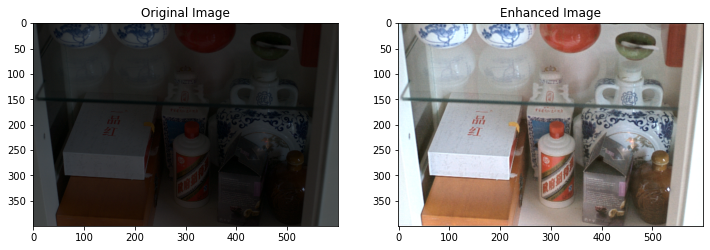

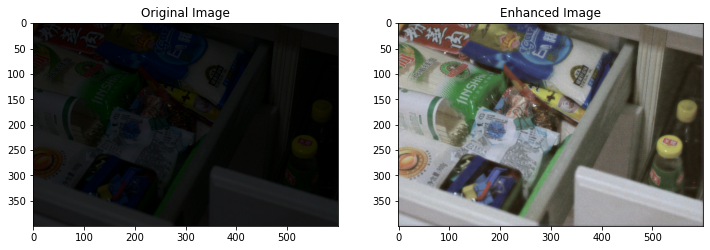

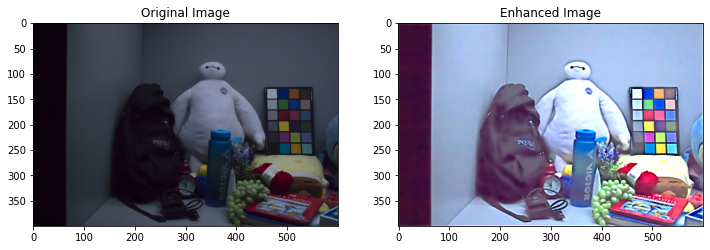

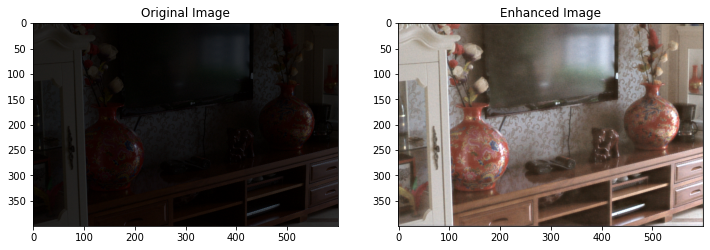

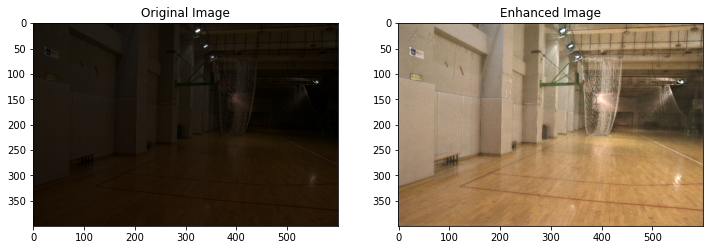

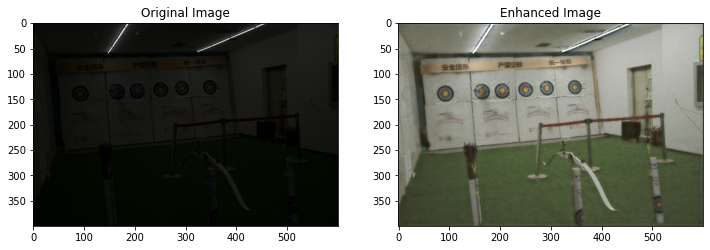

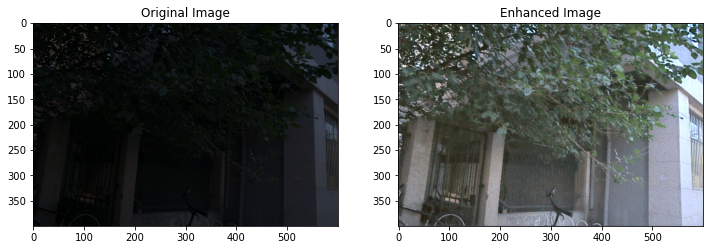

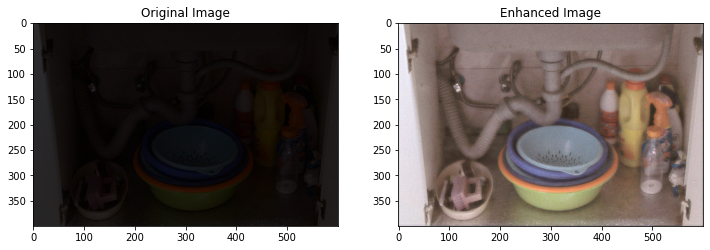

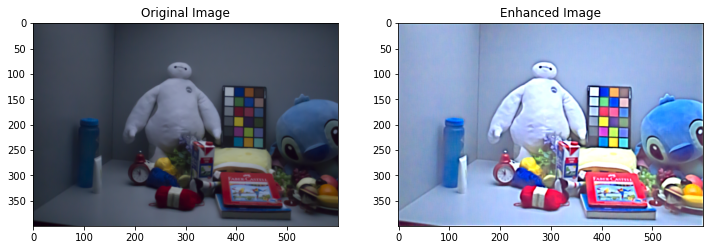

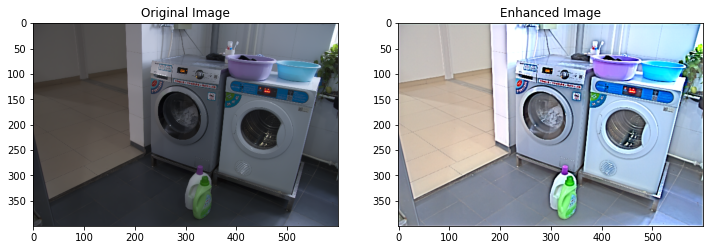

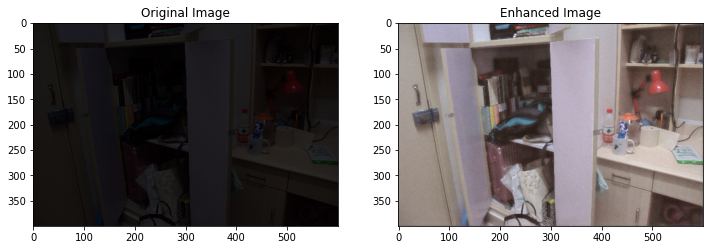

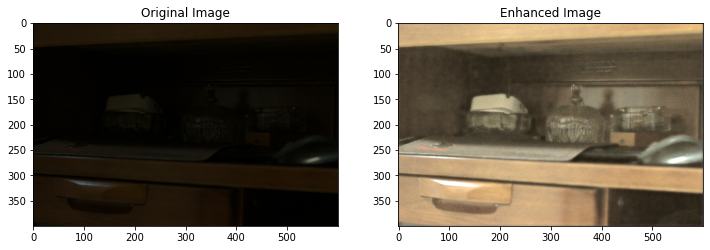

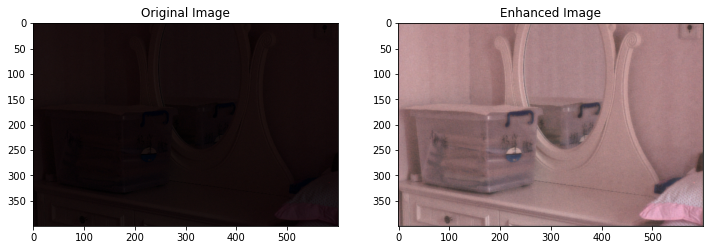

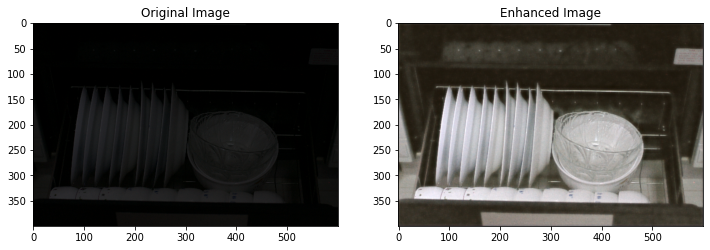

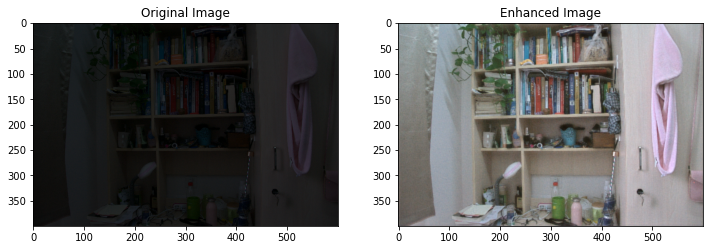

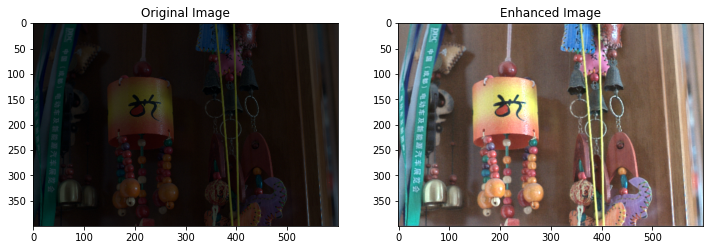

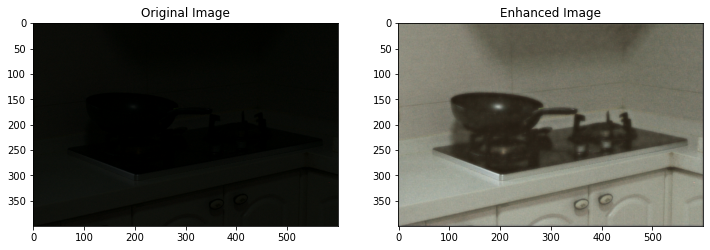

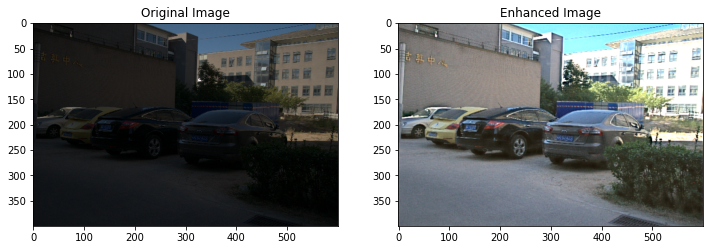

In [10]:
import random

low_light_images = glob('./our485/low/*')
for image_path in random.sample(low_light_images, 20):
    original_image, output_image = inferer.infer(image_path)
    plot_result(original_image, output_image)